# Notes on implementing an effective duty cycle in DC2

This notebook shows how the `calculate_quasar_probability` function implements an effective duty cycle for AGN that  "turns off" a large fraction of the AGN in DC2. Very briefly, red sequence galaxies are assigned a $P_{\rm qso}\approx0.1\%$ probability of hosting a quasar, and main sequence galaxies are assigned a quasar probability according to the distance from the green valley in color-color space. 

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np 

### Color-dependence of $P_{\rm qso}$

The `calculate_quasar_probability` function calculates $P_{\rm qso},$ the probability that a galaxy hosts a quasar. The quantity $P_{\rm qso}$ depends on $M_{\star},$ redshift, and $g-r$ and $r-i$ in the restframe. This first plot shows how `calculate_quasar_probability` depends on both $g-r$ and $r-i.$ We look at this dependence separately for both $z=0$ and $z=2.$ We show plots for $M_{\star}=10^{11}M_{\odot},$ but the color-dependence is $M_{\star}-$independent, as we will see in the other plots below. 

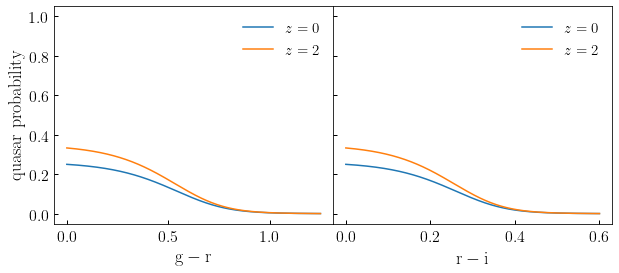

In [3]:
from agn_effective_duty_cycle import calculate_quasar_probability

ngals = int(1e4)
stellar_mass = 10**11.
redshift = 0.
gr_restframe = np.linspace(0, 1.25, ngals)
ri_restframe = np.linspace(0, 0.6, ngals)
prob_z0 = calculate_quasar_probability(stellar_mass, redshift, gr_restframe, ri_restframe)
prob_z2 = calculate_quasar_probability(stellar_mass, 2, gr_restframe, ri_restframe)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
__=fig.subplots_adjust(wspace=0)  #  smash left and right plots
ylim = ax0.set_ylim(-0.05, 1.05)
__=ax0.plot(gr_restframe, prob_z0, label=r'$z=0$')
__=ax0.plot(gr_restframe, prob_z2, label=r'$z=2$')
__=ax1.plot(ri_restframe, prob_z0, label=r'$z=0$')
__=ax1.plot(ri_restframe, prob_z2, label=r'$z=2$')

xlabel = ax0.set_xlabel(r'${\rm g-r}$')
xlabel = ax1.set_xlabel(r'${\rm r-i}$')
ylabel = ax0.set_ylabel(r'${\rm quasar\ probability}$')
leg = ax0.legend()
leg1 = ax1.legend()

Notice that red galaxies have essentially zero probability of hosting a quasar. Also notice how the $z-$dependence of the model only pertains to blue galaxies, such that $P_{\rm qso}$ increases for blue galaxies at higher redshift, but there is no redshift-dependence to $P_{\rm qso}$ for quenched galaxies: at all redshift, red-sequence galaxies have $P_{\rm qso}\approx0.1\%.$ The function defines an eigencolor as a linear combination of $g-r$ and $r-i,$ so that these dependencies are simultaneously implemented in each restframe band. 

The next figure shows how the model parameters $\log P_{z=0}$ and $\delta P_{z=2}$ modify the behavior of the `calculate_quasar_probability` function. The plot shows $g-r,$ but the behavior is the same for $r-i.$

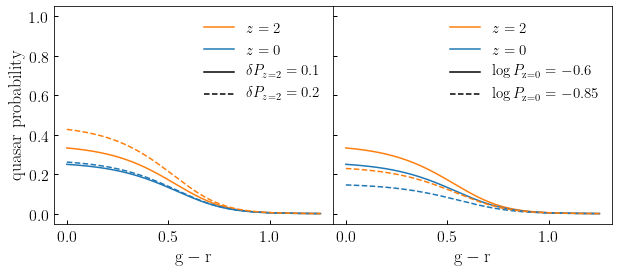

In [4]:
from agn_effective_duty_cycle import calculate_quasar_probability

ngals = int(1e4)
stellar_mass = 10**11.
redshift = 0.
gr_restframe = np.linspace(0, 1.25, ngals)
ri_restframe = np.linspace(0, 0.6, ngals)
prob_z0 = calculate_quasar_probability(stellar_mass, redshift, gr_restframe, ri_restframe)
prob_z2 = calculate_quasar_probability(stellar_mass, 2, gr_restframe, ri_restframe)

prob_z0b = calculate_quasar_probability(stellar_mass, redshift, gr_restframe, ri_restframe,
                                       main_sequence_logprob_z0=-0.85)
prob_z2b = calculate_quasar_probability(stellar_mass, 2, gr_restframe, ri_restframe,
                                       main_sequence_logprob_z0=-0.85)

prob_z0c = calculate_quasar_probability(stellar_mass, redshift, gr_restframe, ri_restframe,
                                       hiz_main_sequence_prob_boost=0.2)
prob_z2c = calculate_quasar_probability(stellar_mass, 2, gr_restframe, ri_restframe,
                                       hiz_main_sequence_prob_boost=0.2)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
__=fig.subplots_adjust(wspace=0)  #  smash left and right plots
ylim = ax0.set_ylim(-0.05, 1.05)
__=ax1.plot(gr_restframe, prob_z2, label=r'$z=2$', color=morange)
__=ax1.plot(gr_restframe, prob_z0, label=r'$z=0$', color=mblue)
__=ax1.plot(gr_restframe, prob_z0b, '--', label=r'$\log P_{\rm z=0}=-0.6$', color=mblue)
__=ax1.plot(gr_restframe, prob_z2b, '--', label=r'$\log P_{\rm z=0}=-0.85$', color=morange)

__=ax0.plot(gr_restframe, prob_z2, label=r'$z=2$', color=morange)
__=ax0.plot(gr_restframe, prob_z0, label=r'$z=0$', color=mblue)
__=ax0.plot(gr_restframe, prob_z0c, '--', label=r'$\delta P_{z=2}=0.1$', color=mblue)
__=ax0.plot(gr_restframe, prob_z2c, '--', label=r'$\delta P_{z=2}=0.2$', color=morange)

xlabel = ax0.set_xlabel(r'${\rm g-r}$')
xlabel = ax1.set_xlabel(r'${\rm g-r}$')
ylabel = ax0.set_ylabel(r'${\rm quasar\ probability}$')
leg0 = ax0.legend()
leg1 = ax1.legend()

leg0.legendHandles[2].set_color('k')
leg0.legendHandles[2].set_linestyle('-')
leg0.legendHandles[3].set_color('k')

leg1.legendHandles[2].set_color('k')
leg1.legendHandles[2].set_linestyle('-')
leg1.legendHandles[3].set_color('k')


In the left panel, we change only $\delta P_{z=2},$ which modifies the high-redshift normalization of $P_{\rm qso}$ for main sequence galaxies, but leaves the $z=0$ galaxies alone. On the other hand, in the right panel we change $\log P_{z=0},$ which effects an overall shift to the main sequence value of $P_{\rm qso},$ affecting $P_{\rm qso}$ equally at all redshift. 

### $M_{\star}-$dependence of $P_{\rm qso}$

At fixed $g-r$ and $r-i$ color, the $P_{\rm qso}$ function has no dependence upon stellar mass. We'll see that in the plot below. Note, though, that in this model high-mass galaxies will still have very low probability of hosting a quasar, because most high-mass galaxies are quenched. 

The overall normalization of $P_{\rm qso}$ for main-sequence galaxies is controlled by the `main_sequence_logprob_z0` parameter, as demonstrated in the figure below. 

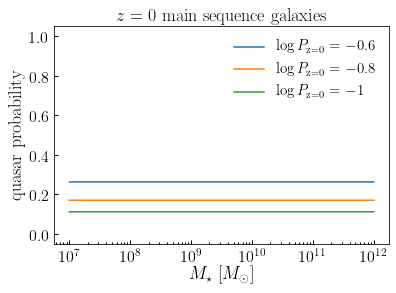

In [5]:
from agn_effective_duty_cycle import calculate_quasar_probability

ngals = int(1e4)
stellar_mass = np.logspace(7, 12, ngals)
redshift = 0.
gr_restframe = -100 # Setting color to ultra-blue effectively selects the behavior at top of the main sequence
ri_restframe = -100 # Setting color to ultra-blue effectively selects the behavior at top of the main sequence
prob = calculate_quasar_probability(stellar_mass, redshift, gr_restframe, ri_restframe)
prob2 = calculate_quasar_probability(stellar_mass, redshift, gr_restframe, ri_restframe, 
                                    main_sequence_logprob_z0=-0.8)
prob3 = calculate_quasar_probability(stellar_mass, redshift, gr_restframe, ri_restframe, 
                                    main_sequence_logprob_z0=-1)

fig, ax = plt.subplots(1, 1)
ylim = ax.set_ylim(-0.05, 1.05)
xscale = ax.set_xscale('log')
__=ax.plot(stellar_mass, prob, label=r'$\log P_{\rm z=0}=-0.6$')
__=ax.plot(stellar_mass, prob2, label=r'$\log P_{\rm z=0}=-0.8$')
__=ax.plot(stellar_mass, prob3, label=r'$\log P_{\rm z=0}=-1$')

leg = ax.legend()

xlabel = ax.set_xlabel(r'$M_{\star}\ [M_{\odot}]$')
ylabel = ax.set_ylabel(r'${\rm quasar\ probability}$')
title = ax.set_title(r'$z=0\ {\rm main\ sequence\ galaxies}$')

## Summary of model behavior:

* The function separates "quenched" and "main sequence" galaxies via an $M_{\star}-$dependent green valley (GV) defined in terms of both $g-r$ and $r-i$ in the restframe.
* Galaxies redwards of the GV cut are assigned a very low $\sim0.1\%$ probability of hosting a quasar; this should ensure that the cluster red sequence is essentially unchanged by the quasar model.
* Galaxies bluewards of the GV cut are assigned a probability to host a quasar that is controllable with the `main_sequence_logprob_z0` parameter, which controls the quasar probability for galaxies at the top of the star-forming sequence.
* The `hiz_main_sequence_prob_boost` parameter controls the increase in the quasar probability at $z\approx2.$
* Sigmoid interpolation is used to smoothly transition the behavior of the `calculate_quasar_probability` function between the control points defined by the input model parameters.
* The numerical values of the model parameters need to be tuned in order to meet the quasar luminosity function validation criteria. Hopefully the flexibility of this implementation will give us enough control to meet the quasar LF specs, but that experimentation remains to be done. We'll have to converge on the details of the validation before we can truly calibrate this model, but even without a calibration it might be worth checking how this sort of duty cycle manifests in the change to the quasar luminosity functions.
